# **Kütüpahneler**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Data set

In [90]:
df = pd.read_csv("/content/drive/MyDrive/Colab çalışma/ModelÇalışma/DDos_tespiti/dataset_sdn.csv")

In [91]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [93]:
print(df.shape)

(104345, 23)


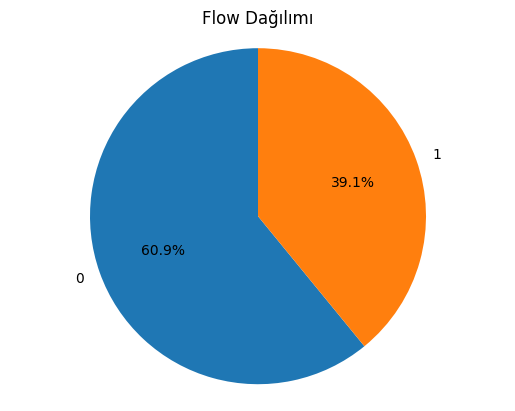

In [94]:

# Attack flow ve Normal flow sütununun değerine göre sayıları
flow_counts = df["label"].value_counts()
# Normal flow = 0  , DDOs Flow = 1
plt.pie(flow_counts, labels=flow_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Flow Dağılımı")
plt.show()

In [95]:
# One-Hot Encoding uygulayarak object türündeki sütunları dönüştür
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

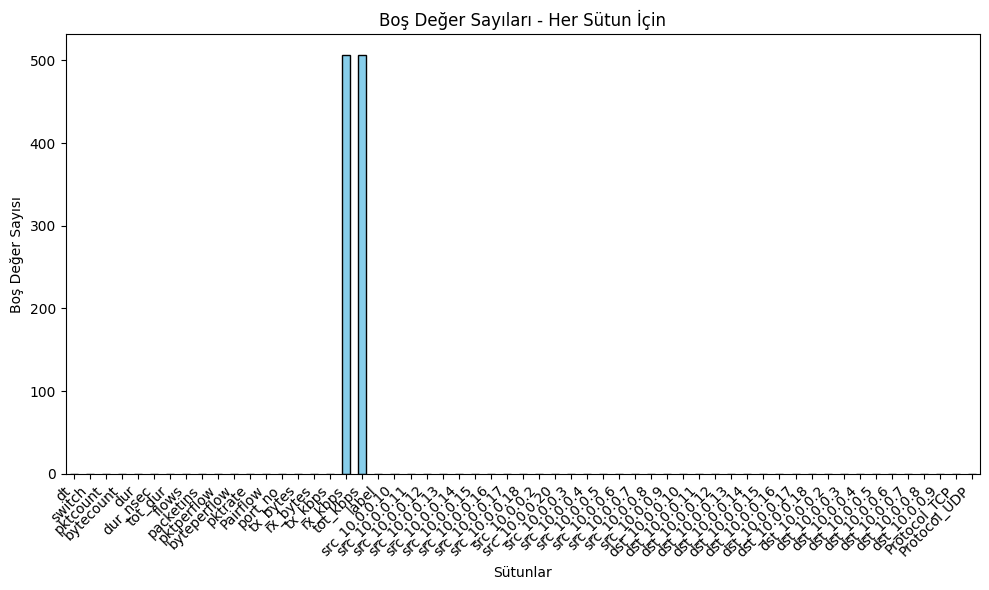

In [96]:

# NaN değererin sayısı sütun bazlı
missing_values = df.isna().sum()
missing_values.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Boş Değer Sayıları - Her Sütun İçin')
plt.xlabel('Sütunlar')
plt.ylabel('Boş Değer Sayısı')
plt.xticks(rotation=45, ha='right')  # Sütun etiketlerini döndürme
plt.tight_layout()
plt.show()

In [97]:
df = df.dropna(axis=1)

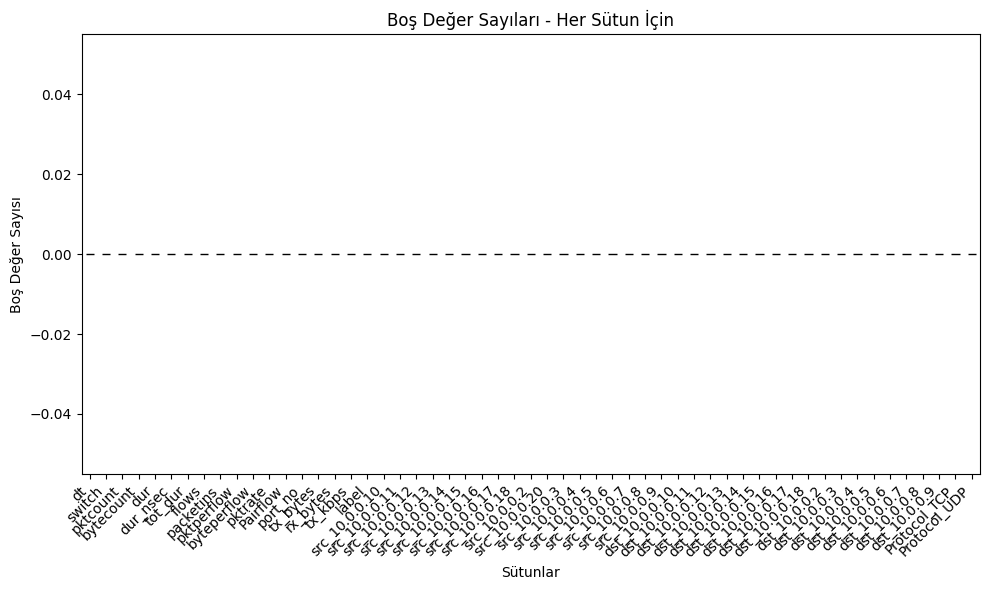

In [98]:
# NaN değererin sayısı sütun bazlı
missing_values = df.isna().sum()
missing_values.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Boş Değer Sayıları - Her Sütun İçin')
plt.xlabel('Sütunlar')
plt.ylabel('Boş Değer Sayısı')
plt.xticks(rotation=45, ha='right')  # Sütun etiketlerini döndürme
plt.tight_layout()
plt.show()

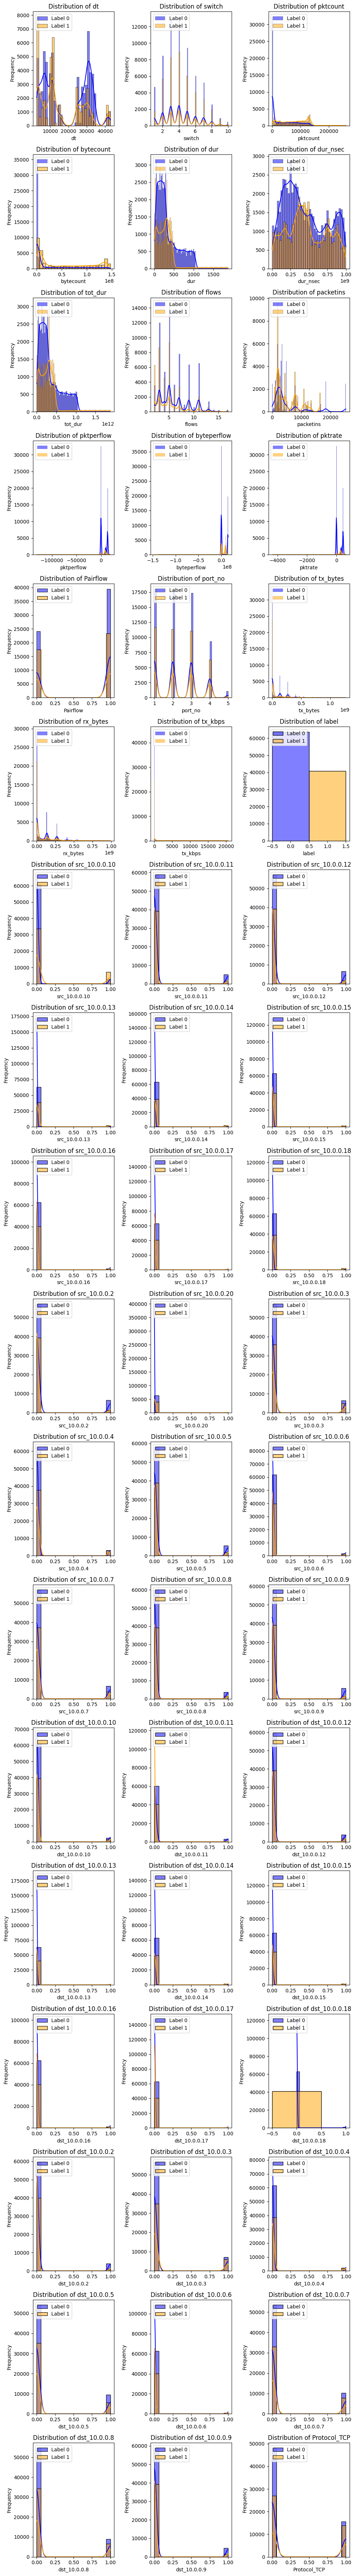

In [99]:
def plot_feature_distributions(df, label_column, n_cols=3):
  feature_names = df.columns[:-1]
  n_rows = (len(feature_names) + n_cols - 1) // n_cols  # Calculate number of rows

  # Create the figure and subplots
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

  # Iterate through features and plot distributions
  for i, feature in enumerate(feature_names):
    row, col = divmod(i, n_cols)
    sns.histplot(df[df[label_column] == 0][feature], label='Label 0', kde=True, color='blue', ax=axes[row, col])
    sns.histplot(df[df[label_column] == 1][feature], label='Label 1', kde=True, color='orange', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend(loc='upper left')

  # Hide unnecessary subplots if there are more features than fit the grid
  for i in range(len(feature_names), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

  plt.tight_layout()
  plt.show()

# Call the function
plot_feature_distributions(df.copy(), label_column="label")

In [100]:
X = df.iloc[:, :-1]
y = df['label']

In [101]:
# Veriyi eğitim, doğrulama ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [102]:

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [103]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
# Modeli derle
model.compile(optimizer=Adam(learning_rate=0.000005), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [105]:
# Modeli eğit
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping]
)

Epoch 1/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4406 - loss: 1.9893 - val_accuracy: 0.4361 - val_loss: 1.7440
Epoch 2/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4836 - loss: 1.8369 - val_accuracy: 0.5419 - val_loss: 1.6440
Epoch 3/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5279 - loss: 1.7206 - val_accuracy: 0.6542 - val_loss: 1.5659
Epoch 4/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5765 - loss: 1.6333 - val_accuracy: 0.7186 - val_loss: 1.4992
Epoch 5/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6088 - loss: 1.5604 - val_accuracy: 0.7568 - val_loss: 1.4388
Epoch 6/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6449 - loss: 1.4929 - val_accuracy: 0.7890 - val_loss: 1.3816
Epoch 7/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6762 - loss: 1.4308 - val_accuracy: 0.8144 - val_loss: 1.3261
Epoch 8/20
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7044 - loss: 1.3707 - 

In [106]:
# Test verisi üzerinde doğruluk
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.6699
Test Accuracy: 0.9873


In [107]:
# Tahminler
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


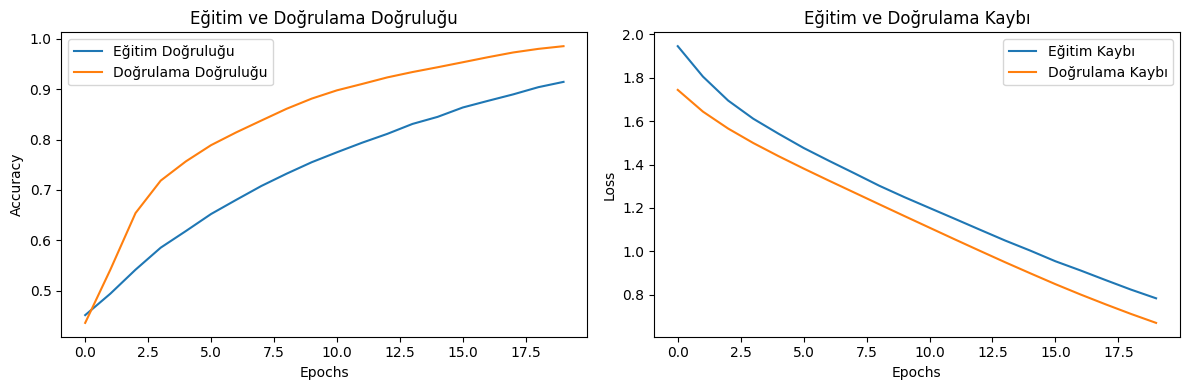

In [114]:
# Eğitim ve Doğrulama Doğruluğu ve Kaybı Grafikleri
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

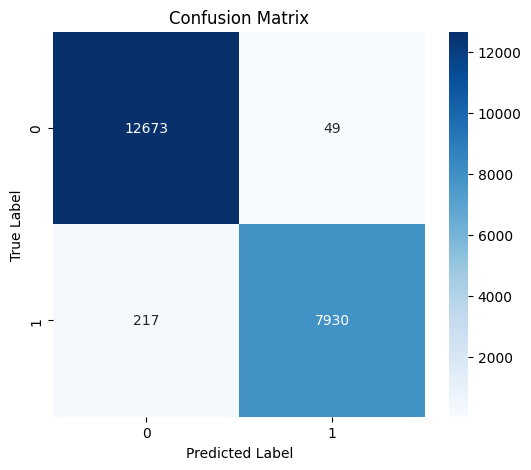

In [110]:
# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

653/653 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


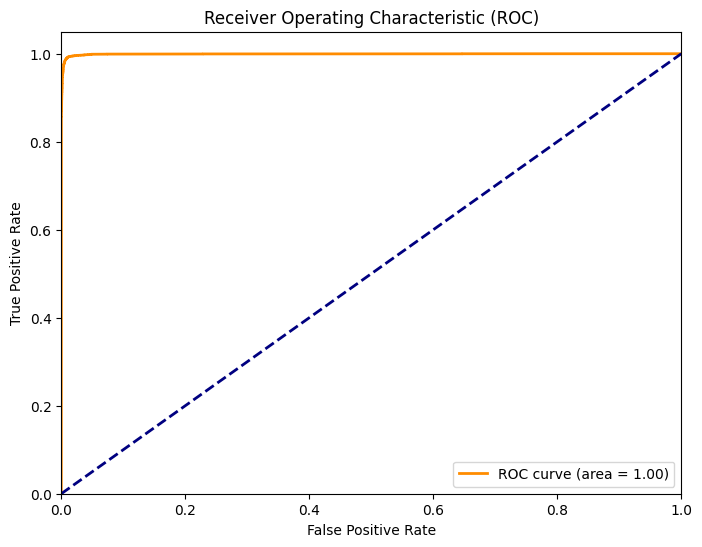

In [111]:
# ROC Eğrisi
y_pred_proba = model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()